In [1]:
import pickle

# Carregando a variável do arquivo
with open('/kaggle/input/takeo-data/New_I.pkl', 'rb') as arquivo:
    X = pickle.load(arquivo)

with open('/kaggle/input/takeo-data/New_Y.pkl', 'rb') as arquivo:
    Y = pickle.load(arquivo)
    
with open('/kaggle/input/takeo-data/New_M_1.pkl', 'rb') as arquivo:
    MASK = pickle.load(arquivo)


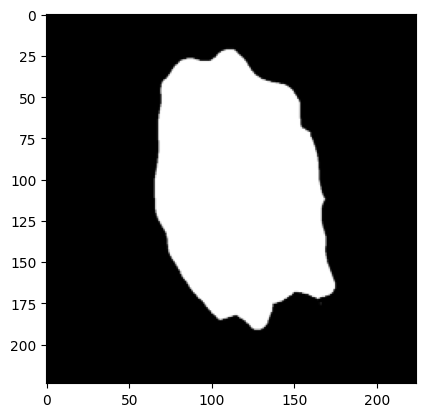

In [2]:
import matplotlib.pyplot as plt

# Exibir a primeira imagem segmentada
plt.imshow(MASK[2], cmap='gray')
plt.show()


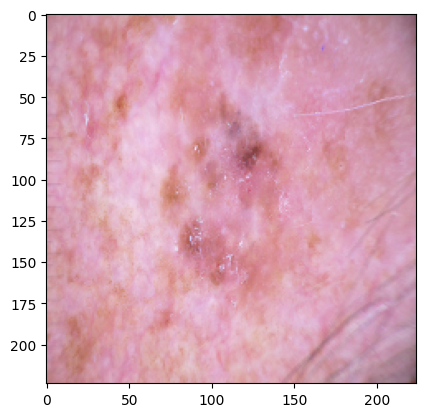

In [3]:
import matplotlib.pyplot as plt

# Exibir a primeira imagem segmentada
plt.imshow(X[2], cmap='gray')
plt.show()


In [4]:


import cv2
import numpy as np

segmented_images = []
for image, mask in zip(X, MASK):
    # Certifique-se de que a máscara está no formato correto (mesmo tamanho da imagem e possivelmente convertida para booleano ou binário)
    mask = mask.astype(bool)
    
    # Aplicar a máscara
    segmented_image = image.copy()
    segmented_image[~mask] = 0  # Isso zera os pixels fora da máscara
    
    segmented_images.append(segmented_image)


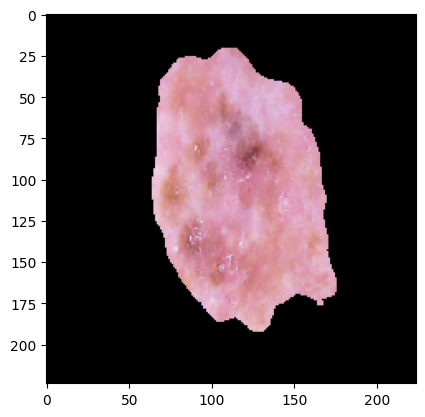

In [6]:
import matplotlib.pyplot as plt

# Exibir a primeira imagem segmentada
plt.imshow(segmented_images[2], cmap='gray')
plt.show()


In [7]:
import numpy as np

unique, counts = np.unique(Y, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print(ocorrencias)

{0: 7923, 1: 2099}


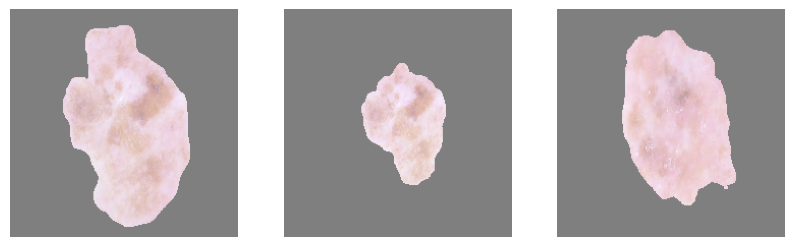

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((segmented_images[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

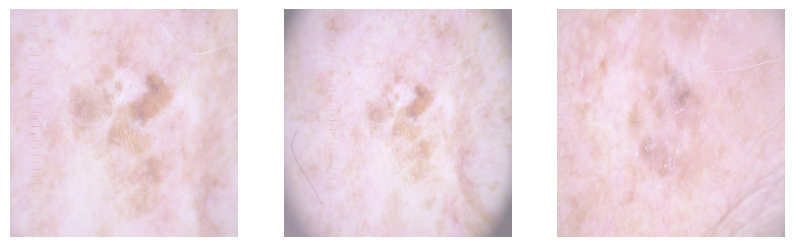

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [11]:
del X

In [12]:
X = np.array(segmented_images)

In [13]:
del segmented_images

In [14]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(10022, 224, 224, 3)

In [16]:
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])

2024-08-01 15:45:01.519205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 15:45:01.519346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 15:45:01.624068: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
print(np.min(X))
print(np.max(X))
X.shape

0.0
255.0


(10022, 100, 100, 3)

In [18]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
X = preprocess_input(X)

In [19]:
print(np.min(X))
print(np.max(X))
X.shape

-1.0
1.0


(10022, 100, 100, 3)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [21]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6330, 1: 1687}
Distribuição no conjunto de teste
{0: 1593, 1: 412}


In [22]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [23]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6330, 1: 6748}
Distribuição no conjunto de teste
{0: 1593, 1: 412}


In [24]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [25]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [26]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0: 4220, 1: 4498}
Distribuição no FOLD 2
{0: 4220, 1: 4499}
Distribuição no FOLD 3
{0: 4220, 1: 4499}


In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

def create_InceptionV3():
    base_model = InceptionV3(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [29]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    i = 0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_InceptionV3()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]

        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        # Calcular AUC-ROC
        auc_roc_val = roc_auc_score(Y_val_fold, previsoes_val)
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, AUC-ROC: {auc_roc_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val, auc_roc_val))
        
        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i += 1
        del modelo

    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5109 - loss: 0.9596   

I0000 00:00:1722527339.865616     174 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722527339.929963     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6242 - loss: 0.7276

W0000 00:00:1722527357.395426     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722527366.266212     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 60s 129ms/step - accuracy: 0.6243 - loss: 0.7274 - val_accuracy: 0.7234 - val_loss: 0.5516 - learning_rate: 0.0010
Epoch 2/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6552 - loss: 0.6520

W0000 00:00:1722527375.082166     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6970 - loss: 0.5912 - val_accuracy: 0.7167 - val_loss: 0.5483 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7388 - loss: 0.5329 - val_accuracy: 0.7112 - val_loss: 0.5479 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7425 - loss: 0.5189 - val_accuracy: 0.7195 - val_loss: 0.5362 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7501 - loss: 0.4950 - val_accuracy: 0.7298 - val_loss: 0.5303 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7776 - loss: 0.4693 - val_accuracy: 0.7303 - val_loss: 0.5330 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7754 - loss: 0.4673 - val_accuracy: 0.7278 - val_loss: 0.5349 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7812 - loss: 0.4515 - val_

W0000 00:00:1722527571.649542     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step


W0000 00:00:1722527579.003455     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.73      0.64      0.69      2110
    Classe 1       0.70      0.78      0.74      2250

    accuracy                           0.71      4360
   macro avg       0.72      0.71      0.71      4360
weighted avg       0.72      0.71      0.71      4360

F1: 0.7125, Recall: 0.7127, Precision: 0.7175, AUC-ROC: 0.7887
Epoch 1/30
  7/273 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5332 - loss: 0.8160  

W0000 00:00:1722527602.672911     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6376 - loss: 0.7104

W0000 00:00:1722527620.334268     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722527627.247086     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.6376 - loss: 0.7102 - val_accuracy: 0.6972 - val_loss: 0.6025 - learning_rate: 0.0010
Epoch 2/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6243 - loss: 0.6699

W0000 00:00:1722527635.974731     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7012 - loss: 0.5772 - val_accuracy: 0.7215 - val_loss: 0.5482 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7271 - loss: 0.5344 - val_accuracy: 0.7307 - val_loss: 0.5390 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7466 - loss: 0.5048 - val_accuracy: 0.7288 - val_loss: 0.5426 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7598 - loss: 0.4882 - val_accuracy: 0.7284 - val_loss: 0.5363 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7663 - loss: 0.4716 - val_accuracy: 0.7341 - val_loss: 0.5349 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7745 - loss: 0.4631 - val_accuracy: 0.7197 - val_loss: 0.5505 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7782 - loss: 0.4499 - val_

W0000 00:00:1722527830.721076     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step


W0000 00:00:1722527838.545654     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.70      0.75      0.72      2110
    Classe 1       0.75      0.70      0.73      2249

    accuracy                           0.72      4359
   macro avg       0.73      0.73      0.72      4359
weighted avg       0.73      0.72      0.72      4359

F1: 0.7247, Recall: 0.7254, Precision: 0.7253, AUC-ROC: 0.8037
Epoch 1/30
  7/273 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4810 - loss: 1.0051  

W0000 00:00:1722527862.712177     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6297 - loss: 0.7208

W0000 00:00:1722527875.919485     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722527882.680574     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.6298 - loss: 0.7205 - val_accuracy: 0.6956 - val_loss: 0.6313 - learning_rate: 0.0010
Epoch 2/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6753 - loss: 0.6211

W0000 00:00:1722527887.635081     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7115 - loss: 0.5744 - val_accuracy: 0.7220 - val_loss: 0.5430 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7242 - loss: 0.5460 - val_accuracy: 0.7176 - val_loss: 0.5410 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7437 - loss: 0.5160 - val_accuracy: 0.7245 - val_loss: 0.5306 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7564 - loss: 0.4944 - val_accuracy: 0.7119 - val_loss: 0.5647 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7623 - loss: 0.4824 - val_accuracy: 0.7107 - val_loss: 0.5614 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7714 - loss: 0.4674 - val_accuracy: 0.7029 - val_loss: 0.5926 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7655 - loss: 0.4766 - val_

W0000 00:00:1722528083.623215     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.74      0.66      0.70      2110
    Classe 1       0.71      0.78      0.75      2249

    accuracy                           0.72      4359
   macro avg       0.73      0.72      0.72      4359
weighted avg       0.72      0.72      0.72      4359

F1: 0.7213, Recall: 0.7214, Precision: 0.7254, AUC-ROC: 0.7930
[[(0.712451579654496, 0.7126750921537652, 0.7175315322962716, 0.7886863612427594), (0.7247057486121609, 0.7253646170283159, 0.725297769148803, 0.8037145524393149), (0.7213122454042891, 0.7213505107061802, 0.7254395385762467, 0.7929765519799216)]]


W0000 00:00:1722528090.651695     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [30]:
model = melhor_model

In [31]:
Y_test = np.array(Y_test)

Forma de X_test: (2005, 100, 100, 3)
Forma de Y_test: (2005,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step


W0000 00:00:1722528199.535475     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Forma das previsões: (2005, 1)
Acurácia no conjunto de teste: 0.7541147132169576
Matriz de Confusão:
 [[1243  350]
 [ 143  269]]


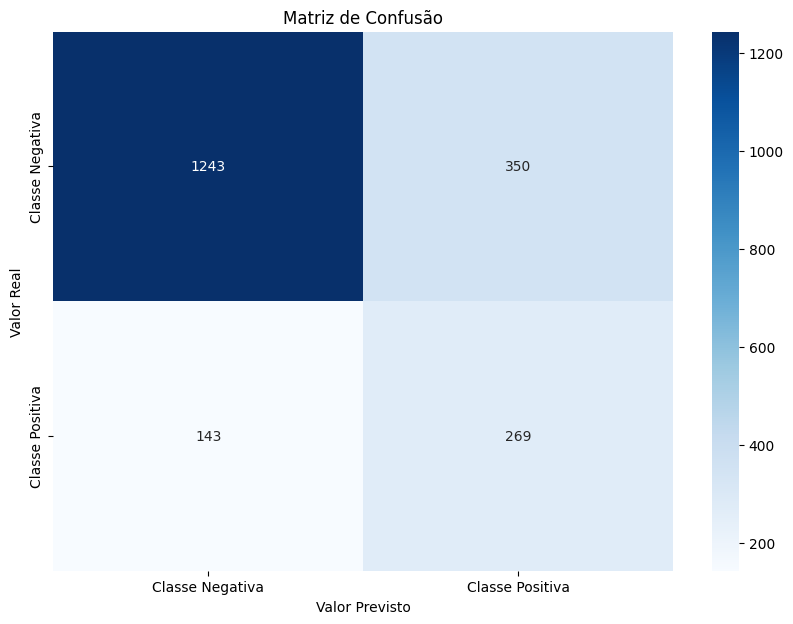

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.90      0.78      0.83      1593
    Classe 1       0.43      0.65      0.52       412

    accuracy                           0.75      2005
   macro avg       0.67      0.72      0.68      2005
weighted avg       0.80      0.75      0.77      2005



In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=30):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=10,verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


melor fold = 2
OIBOMDIA 0
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5355 - loss: 0.9395  

W0000 00:00:1722528273.086158     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6265 - loss: 0.7246

W0000 00:00:1722528287.736479     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722528294.220412     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.6266 - loss: 0.7245 - val_accuracy: 0.6588 - val_loss: 0.6433 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7059 - loss: 0.5874 - val_accuracy: 0.6778 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7192 - loss: 0.5396 - val_accuracy: 0.7041 - val_loss: 0.5721 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7353 - loss: 0.5219 - val_accuracy: 0.6858 - val_loss: 0.5718 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7491 - loss: 0.5043 - val_accuracy: 0.7081 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7519 - loss: 0.4900 - val_accuracy: 0.6869 - val_loss: 0.5781 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7655 - loss: 0.4827 - val

W0000 00:00:1722528395.752316     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step


W0000 00:00:1722528401.869938     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6412690726117397
Recall : 0.7115764357413197
F1-Score : 0.6317716321464266
OIBOMDIA 1
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5137 - loss: 0.9085 

W0000 00:00:1722528425.204447     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6316 - loss: 0.7228

W0000 00:00:1722528439.465416     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722528445.411960     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6316 - loss: 0.7227 - val_accuracy: 0.6909 - val_loss: 0.5878 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6913 - loss: 0.5965 - val_accuracy: 0.6881 - val_loss: 0.6054 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7057 - loss: 0.5654 - val_accuracy: 0.6955 - val_loss: 0.5839 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7386 - loss: 0.5212 - val_accuracy: 0.6984 - val_loss: 0.5728 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7425 - loss: 0.5057 - val_accuracy: 0.6697 - val_loss: 0.6135 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7587 - loss: 0.5023 - val_accuracy: 0.7127 - val_loss: 0.5801 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7485 - loss: 0.4969 - val

W0000 00:00:1722528554.489817     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step


W0000 00:00:1722528560.735212     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6402457879981241
Recall : 0.7086891070764693
F1-Score : 0.6332257435080244
OIBOMDIA 2
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5177 - loss: 0.9070 

W0000 00:00:1722528584.618193     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6277 - loss: 0.7507

W0000 00:00:1722528599.092243     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722528605.162196     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6278 - loss: 0.7505 - val_accuracy: 0.6881 - val_loss: 0.5814 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6897 - loss: 0.5887 - val_accuracy: 0.6892 - val_loss: 0.5803 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7146 - loss: 0.5546 - val_accuracy: 0.7058 - val_loss: 0.5755 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7242 - loss: 0.5407 - val_accuracy: 0.7024 - val_loss: 0.5700 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7313 - loss: 0.5137 - val_accuracy: 0.6766 - val_loss: 0.5768 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7515 - loss: 0.5042 - val_accuracy: 0.6915 - val_loss: 0.6058 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7569 - loss: 0.4922 - val

W0000 00:00:1722528758.139048     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step


W0000 00:00:1722528764.293439     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.653937728937729
Recall : 0.7241107941906033
F1-Score : 0.6549953320218538
OIBOMDIA 3
Epoch 1/30
  9/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4674 - loss: 0.9218 

W0000 00:00:1722528787.830985     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6198 - loss: 0.7315

W0000 00:00:1722528801.765551     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722528807.730996     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6198 - loss: 0.7314 - val_accuracy: 0.7030 - val_loss: 0.5847 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6983 - loss: 0.5874 - val_accuracy: 0.6995 - val_loss: 0.5639 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7037 - loss: 0.5566 - val_accuracy: 0.6927 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7428 - loss: 0.5162 - val_accuracy: 0.7018 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7477 - loss: 0.5074 - val_accuracy: 0.7001 - val_loss: 0.5641 - learning_rate: 0.0010
Epoch 6/30
433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7467 - loss: 0.5091
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7467 - loss: 0.5090 - val

W0000 00:00:1722528928.632487     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step


W0000 00:00:1722528934.759728     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6467351317884684
Recall : 0.7108869812712169
F1-Score : 0.6493173917343968
OIBOMDIA 4
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6491 - loss: 0.8436 

W0000 00:00:1722528958.695039     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6380 - loss: 0.7200

W0000 00:00:1722528973.320473     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722528979.342545     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6381 - loss: 0.7198 - val_accuracy: 0.6709 - val_loss: 0.6005 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6989 - loss: 0.5781 - val_accuracy: 0.7070 - val_loss: 0.5612 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7157 - loss: 0.5468 - val_accuracy: 0.6886 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7413 - loss: 0.5182 - val_accuracy: 0.6944 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7386 - loss: 0.5104 - val_accuracy: 0.7122 - val_loss: 0.5556 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7444 - loss: 0.5041 - val_accuracy: 0.6778 - val_loss: 0.5772 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7495 - loss: 0.4879 - val

W0000 00:00:1722529114.828811     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step


W0000 00:00:1722529121.024217     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6490342275514006
Recall : 0.714527757970246
F1-Score : 0.6516591195343511
OIBOMDIA 5
Epoch 1/30
  7/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5571 - loss: 0.8370  

W0000 00:00:1722529145.240059     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6268 - loss: 0.7268

W0000 00:00:1722529159.587396     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722529165.753958     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6268 - loss: 0.7267 - val_accuracy: 0.6634 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6951 - loss: 0.5828 - val_accuracy: 0.6852 - val_loss: 0.5710 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7139 - loss: 0.5559 - val_accuracy: 0.6898 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7350 - loss: 0.5246 - val_accuracy: 0.7001 - val_loss: 0.5727 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7426 - loss: 0.5124 - val_accuracy: 0.6938 - val_loss: 0.5621 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7565 - loss: 0.4977 - val_accuracy: 0.6955 - val_loss: 0.5814 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7458 - loss: 0.5082 - val

W0000 00:00:1722529362.361117     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step


W0000 00:00:1722529368.525589     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.650456583995245
Recall : 0.7206162884951761
F1-Score : 0.6493280580096525
OIBOMDIA 6
Epoch 1/30
  9/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5689 - loss: 0.8494 

W0000 00:00:1722529392.491740     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6322 - loss: 0.7250

W0000 00:00:1722529406.516456     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722529412.483704     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6323 - loss: 0.7249 - val_accuracy: 0.6674 - val_loss: 0.6157 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6979 - loss: 0.5900 - val_accuracy: 0.6732 - val_loss: 0.5929 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7165 - loss: 0.5557 - val_accuracy: 0.6967 - val_loss: 0.5639 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7430 - loss: 0.5240 - val_accuracy: 0.7030 - val_loss: 0.5612 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7458 - loss: 0.5053 - val_accuracy: 0.7041 - val_loss: 0.5630 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7481 - loss: 0.5022 - val_accuracy: 0.6858 - val_loss: 0.5890 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7545 - loss: 0.5069 - val

W0000 00:00:1722529527.168567     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step


W0000 00:00:1722529533.256702     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6528088289093938
Recall : 0.7062009763589491
F1-Score : 0.6626371015375984
OIBOMDIA 7
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4942 - loss: 0.8933  

W0000 00:00:1722529557.068218     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6382 - loss: 0.7090

W0000 00:00:1722529571.228914     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722529577.160770     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6382 - loss: 0.7090 - val_accuracy: 0.6881 - val_loss: 0.5815 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7002 - loss: 0.5830 - val_accuracy: 0.6823 - val_loss: 0.5781 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7236 - loss: 0.5429 - val_accuracy: 0.6881 - val_loss: 0.5781 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7338 - loss: 0.5319 - val_accuracy: 0.6944 - val_loss: 0.5767 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7571 - loss: 0.5002 - val_accuracy: 0.6864 - val_loss: 0.5843 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7441 - loss: 0.5014 - val_accuracy: 0.7018 - val_loss: 0.5683 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7529 - loss: 0.4928 - val

W0000 00:00:1722529724.661171     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step


W0000 00:00:1722529730.735290     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6325519614655568
Recall : 0.6709024311459724
F1-Score : 0.6414351011734756
OIBOMDIA 8
Epoch 1/30
  9/436 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5874 - loss: 0.8545 

W0000 00:00:1722529755.350497     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6314 - loss: 0.7322

W0000 00:00:1722529769.339947     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722529775.263186     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6314 - loss: 0.7320 - val_accuracy: 0.7030 - val_loss: 0.5820 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6980 - loss: 0.5762 - val_accuracy: 0.6909 - val_loss: 0.5923 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7198 - loss: 0.5515 - val_accuracy: 0.6944 - val_loss: 0.5737 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7407 - loss: 0.5155 - val_accuracy: 0.6921 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7388 - loss: 0.5065 - val_accuracy: 0.6955 - val_loss: 0.5890 - learning_rate: 0.0010
Epoch 6/30
435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7498 - loss: 0.4962
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7497 - loss: 0.4962 - val

W0000 00:00:1722529917.065738     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step


W0000 00:00:1722529923.204666     175 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6438527566786769
Recall : 0.7160750309302226
F1-Score : 0.6333211411850768
OIBOMDIA 9
Epoch 1/30
 10/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5673 - loss: 0.9304  

W0000 00:00:1722529947.577890     174 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6239 - loss: 0.7494

W0000 00:00:1722529961.555511     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722529967.579435     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6240 - loss: 0.7493 - val_accuracy: 0.6829 - val_loss: 0.6089 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6875 - loss: 0.6016 - val_accuracy: 0.6932 - val_loss: 0.5648 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7186 - loss: 0.5530 - val_accuracy: 0.7018 - val_loss: 0.5585 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7360 - loss: 0.5302 - val_accuracy: 0.6984 - val_loss: 0.5707 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7343 - loss: 0.5216 - val_accuracy: 0.6755 - val_loss: 0.5895 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7435 - loss: 0.4983 - val_accuracy: 0.6950 - val_loss: 0.5694 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7558 - loss: 0.4874 - val

W0000 00:00:1722530108.456485     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step


W0000 00:00:1722530114.589763     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6489570913310283
Recall : 0.7128121209904985
F1-Score : 0.6528138528138527
Acurácia média: 0.7068827930174564 ± 0.017823080642617898
Precisão média: 0.6459849171267363 ± 0.006234347812905281
Recall médio: 0.7096397924170674 ± 0.013870400185933713
F1-Score médio: 0.6460504473664709 ± 0.01002715723094252


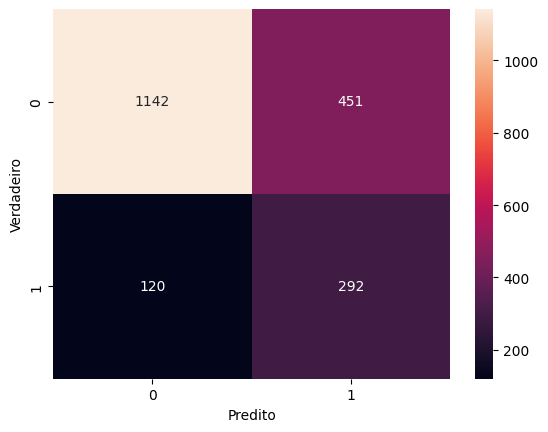

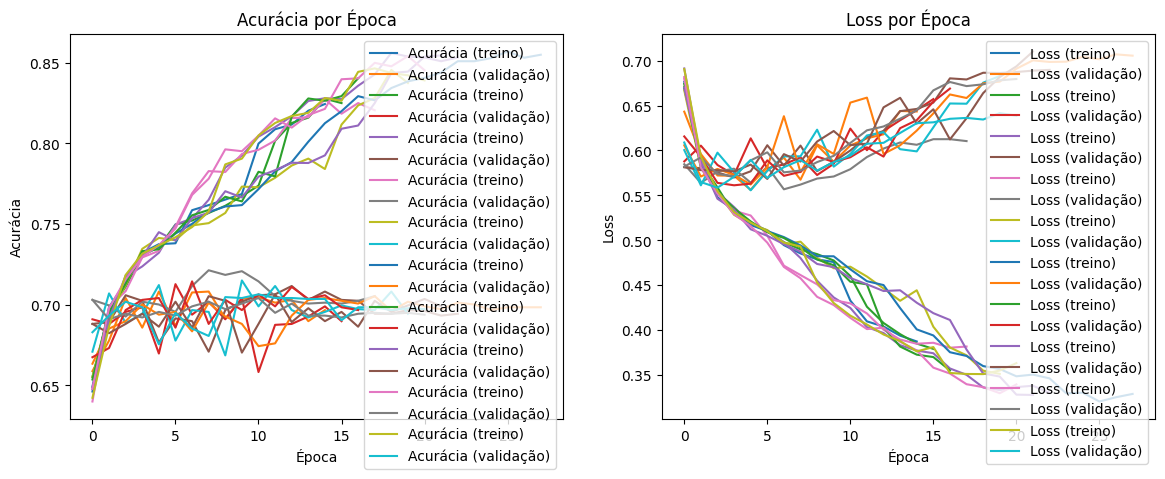

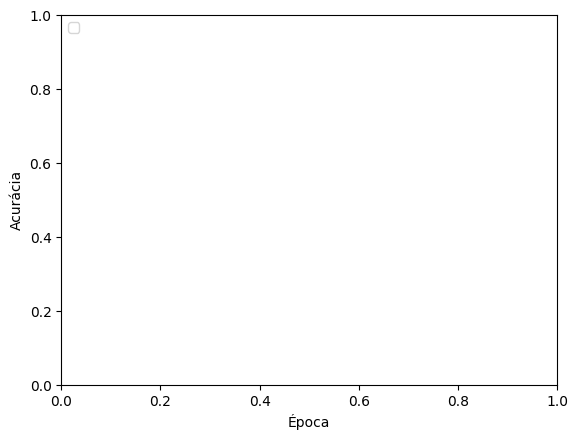

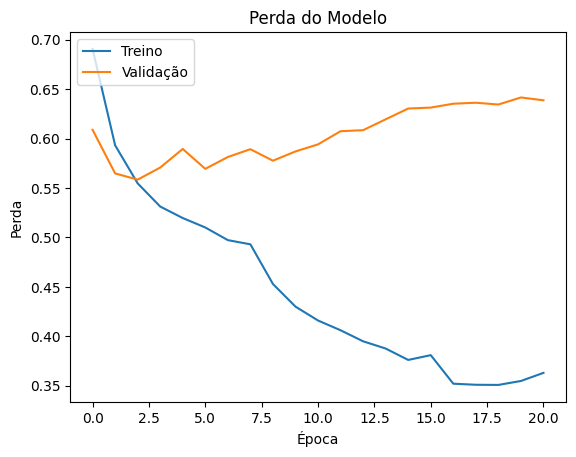

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    print("OIBOMDIA",i)
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão : {precisao_classe_1}")
    print(f"Recall : {recall_classe_1}")
    print(f"F1-Score : {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

# Sumarize o histórico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()